In [2]:
%matplotlib inline
import os
from os.path import join as oj
import sys, time
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('precision', 3)

In [3]:
save_path = "../results_for_export"
trained_model_folder = '../models/ColorMNIST'
fnames = [oj(trained_model_folder, fname) for fname in os.listdir(trained_model_folder)]

results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 
results = pd.concat(results_list, axis=1).T.infer_objects() 

In [4]:
results['final_acc'] = [x[-1] for x in results['accs_test']] 
results['final_acc_train'] = [x[-1] for x in results['accs_train']]
results['final_cd'] = [x[-1] for x in results['cd']]
results['final_test_loss'] = [min(x) for x in results['losses_test']]
results['final_train_loss'] = [min(x) for x in results['losses_train']]


In [5]:
results.reset_index(drop=True, inplace=True)
results_save = results[['regularizer_rate','final_acc','final_acc_train','final_test_loss', 'final_cd', 'method', 'dataset','seed' ]].sort_values(by = ['regularizer_rate'])

In [6]:
concise_results = results_save.groupby(by = ['dataset', 'method','regularizer_rate']).mean()
concise_results.columns = ['Test accuracy', 'Train accuracy', 'Test loss' , 'CD','seed']
concise_results

Test accuracy  Train accuracy  Test loss  \
dataset method     regularizer_rate                                             
Color   CDEP       0.0                       0.290         100.000     29.160   
                   0.1                       2.883         100.000     26.304   
                   1.0                       3.274         100.000     21.720   
                   5.0                      15.064          99.922     12.603   
                   10.0                     13.951          99.961     12.751   
                   50.0                     20.187          99.570      7.581   
                   100.0                    21.230          98.945      6.116   
                   500.0                    23.879          95.664      4.121   
                   1000.0                   24.940          92.500      2.998   
                   5000.0                   25.805          88.555      4.902   
        EGradients 0.1                       0.106         100.000     22.532   
                   1.0                       0.186          99.688     29.835   
                   500.0                     0.086         100.000     22.109   
                   1000.0                    0.360         100.000     21.703   
                   5000.0                    0.156         100.000     23.894   
        Grad       0.0                       0.296         100.000     26.906   
                   0.1                       0.010         100.000     22.696   
                   1.0                       0.050         100.000     26.653   
                   5.0                       0.228         100.000     26.878   
                   10.0                      0.298         100.000     26.726   
                   50.0                      0.330         100.000     26.575   
                   100.0                     0.348         100.000     26.788   
                   500.0                     0.390         100.000     26.540   
                   1000.0                    0.292         100.000     26.955   
                   5000.0                    0.006         100.000     21.045   

                                            CD    seed  
dataset method     regularizer_rate                     
Color   CDEP       0.0               0.000e+00   1.818  
                   0.1               6.498e-04   1.000  
                   1.0               2.696e-05   1.444  
                   5.0               2.149e-17   2.000  
                   10.0              4.689e-16   2.000  
                   50.0              4.249e-22   2.000  
                   100.0             3.609e-23   2.000  
                   500.0             3.865e-24   2.000  
                   1000.0            1.128e-24   2.000  
                   5000.0            7.284e-23   2.000  
        EGradients 0.1               0.000e+00   2.000  
                   1.0               0.000e+00   2.000  
                   500.0             0.000e+00   2.000  
                   1000.0            0.000e+00   2.000  
                   5000.0            0.000e+00   2.000  
        Grad       0.0               0.000e+00   1.778  
                   0.1               3.530e-11   2.000  
                   1.0               1.028e-10  42.000  
                   5.0               1.261e-10   2.000  
                   10.0              1.117e-10   2.000  
                   50.0              1.310e-10   2.000  
                   100.0             1.461e-10   2.000  
                   500.0             1.505e-10   2.000  
                   1000.0            1.126e-10   2.000  
                   5000.0            1.142e-10   2.000

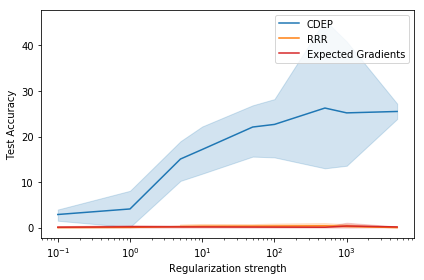

In [73]:
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'CDEP'],label="CDEP",legend = "brief"  );
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'Grad'], label="RRR" );
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'ExpectedGrad'], label="Expected Gradients");
plot = sns.lineplot(x ='regularizer_rate' , y='final_acc', data = results_save[results_save.method == 'EGradients'], label="Expected Gradients");
plot.set(xscale="log")
plot.set_xlabel("Regularization strength")
plot.set_ylabel("Test Accuracy")
plot.set_title("");
fig  = plot.get_figure()
fig.tight_layout()
# fig.savefig(oj(save_path,"ColorMNIST_results"))
plt.show()